In [3]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [9]:
l = cast[cast.title == "Superman"]
l

,title,year,name,type,character,n
30630,Superman,1948,Fred Aldrich,actor,Cop at Museum,NaN
33194,Superman,1978,Keith Alexander,actor,Newscaster,73.0
46484,Superman,1948,Kirk Alyn,actor,Superman,1.0
46485,Superman,1948,Kirk Alyn,actor,Clark Kent,1.0
46486,Superman,1978,Kirk Alyn,actor,General Sam Lane,NaN
56368,Superman,1978,Vass Anderson,actor,3rd Elder,19.0
58660,Superman,1978,Harry Andrews,actor,2nd Elder,18.0
78972,Superman,1973,Harry Arnie,actor,Blinkie,15.0
79885,Superman,1948,Phil Arnold,actor,Cabbie,NaN
90025,Superman,1978,Jeff Atcheson,actor,Coach,31.0


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [8]:

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [11]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [12]:
print("Batman Years: ")
print(len(d[d <0]))

Batman Years: 
24


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

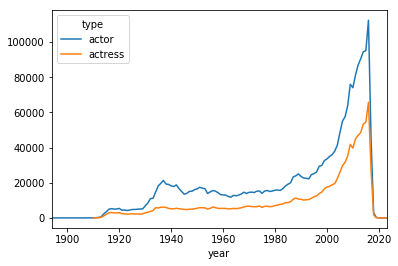

In [14]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

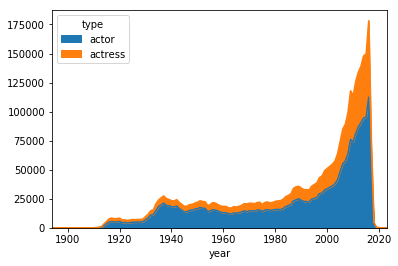

In [15]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [21]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type').fillna(0)
#a = c[(c.type == 'actor') - (c.type == 'actress')
#a.plot()
#c = c['actor'] - ['actress']
#c.plot()

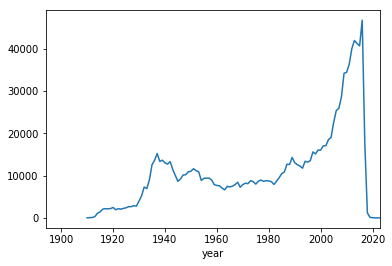

In [9]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()
#essentially turn into columns so they do not have to be quotationed.

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [28]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
#((c.actor)/(c.actor + c.actress)).plot(ylim=[0,1])
c.head()


type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


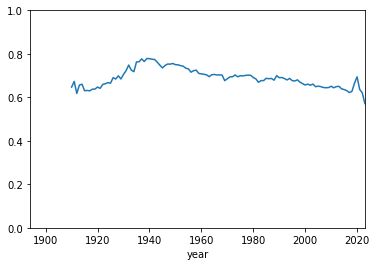

In [29]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
((c.actor)/(c.actor + c.actress)).plot(ylim=[0,1])


### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

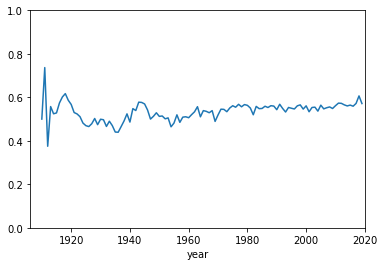

In [30]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

In [ ]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
((c.actor)/(c.actor + c.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

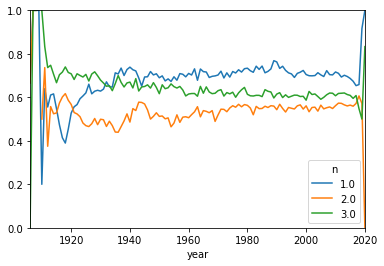

In [31]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type').fillna(0)
r = (c.actor)/(c.actor+c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])